# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

Perform customer segmentation using bank data into distinct categories based on their behavioral patterns

## Learning Objectives

At the end of the experiment, you will be able to:

* Understand clustering
* Find groups or clusters using K-means algorithm
* Visualize the high-dimensional data to low-dimensional data (2D) by applying t-SNE algorithm

## Domain Information

- **Customer segmentation** refers to the process of dividing a set of potential customers into groups (or segments) based on shared attributes, interests, and behaviors.
- One of the key pain points for bank marketing team is to know their customers and identify their needs.
- For this mini-hackathon, we will use the popular **K-Means clustering** algorithm to segment customers based on their behavior from the bank data. The basic concept is that consumers who share common traits would respond to marketing communication in a similar way so that the bank marketing team can reach out to each group in a relevant and effective way.

## Dataset

### Description

The dataset chosen for this mini hackathon is the behavior of customers in the bank for 6 months, this dataset is made up of 13 features.

**Attribute Information**

- **CUSTID:** Identification of Credit Cardholder 
- **BALANCE:** Balance amount left in customer's account to make purchases
- **PURCHASES:** Amount of purchases made from the account
- **INSTALLMENTS_PURCHASES:** Amount of purchase done in installment
- **CASH_ADVANCE:** Cash in advance given by the user
- **PURCHASES_FREQUENCY:** How frequently the Purchases are being made score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- **CASH_ADVANCE_FREQUENCY:** How frequently the cash in advance being paid
- **CASH_ADVANCE_TRX:** Number of Transactions made with "Cash in Advance"
- **CREDIT_LIMIT:** Limit of Credit Card for user
- **PAYMENTS:** Amount of Payment done by a user
- **MINIMUM_PAYMENTS:** Minimum amount of payments made by a user
- **PRC_FULL_PAYMENT:** Percent of full payment paid by a user
- **TENURE:** Tenure of credit card service for user

## Grading = 20 Marks

## Setup Steps

In [ ]:
! wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Marketing_data_clustering.csv

### Importing Required Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

## **Stage 1:** Data Pre-Processing (4 Marks)

- Replace the missing values in any other column appropriately with mean / median / mode.

  Hint: Use pandas [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) function to replace the missing values

- Perform correlation on the data features and remove highly correlated features from the data
  
  Hint: Use pandas [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

- Drop any unwanted columns
  
  Hint: Use pandas [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

- Perform `StandardScaler()` on the data features
  
  Hint: Use Sklearns [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)



In [ ]:
# YOUR CODE HERE
creditcard_df = pd.read_csv('Marketing_data_clustering.csv')
creditcard_df.shape

(2994, 13)

In [ ]:
creditcard_df.head(2)

,CUST_ID,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,95.4,95.4,0.0,0.166667,0.0,0,1000.0,201.802084,139.509787,0.0,12
1,C10005,817.714335,16.0,0.0,0.0,0.083333,0.0,0,1200.0,678.334763,244.791237,0.0,12


In [ ]:
creditcard_df.isnull().sum()

CUST_ID                    0
BALANCE                    0
PURCHASES                  0
INSTALLMENTS_PURCHASES     0
CASH_ADVANCE               0
PURCHASES_FREQUENCY        0
CASH_ADVANCE_FREQUENCY     0
CASH_ADVANCE_TRX           0
CREDIT_LIMIT               0
PAYMENTS                   0
MINIMUM_PAYMENTS          49
PRC_FULL_PAYMENT           0
TENURE                     0
dtype: int64

In [ ]:
creditcard_df['MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].fillna(creditcard_df['MINIMUM_PAYMENTS'].mean())

In [ ]:
cor = creditcard_df.corr()
cor

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,-0.034273,-0.108315,0.368653,-0.205498,0.346867,0.319499,0.318990,0.206895,0.768832,-0.359114,NaN
PURCHASES,-0.034273,1.000000,0.669130,-0.204737,0.604114,-0.256953,-0.222998,0.210281,0.209721,0.013705,0.089057,NaN
INSTALLMENTS_PURCHASES,-0.108315,0.669130,1.000000,-0.190027,0.733458,-0.254217,-0.228237,0.086503,0.119167,0.011561,0.153122,NaN
CASH_ADVANCE,0.368653,-0.204737,-0.190027,1.000000,-0.309937,0.643990,0.682928,0.082986,0.323777,0.213419,-0.038101,NaN
PURCHASES_FREQUENCY,-0.205498,0.604114,0.733458,-0.309937,1.000000,-0.376825,-0.332471,0.033842,0.014541,-0.045405,0.203014,NaN
CASH_ADVANCE_FREQUENCY,0.346867,-0.256953,-0.254217,0.643990,-0.376825,1.000000,0.910790,-0.043460,0.173395,0.217509,-0.116330,NaN
CASH_ADVANCE_TRX,0.319499,-0.222998,-0.228237,0.682928,-0.332471,0.910790,1.000000,-0.044277,0.183596,0.222655,-0.106766,NaN
CREDIT_LIMIT,0.318990,0.210281,0.086503,0.082986,0.033842,-0.043460,-0.044277,1.000000,0.191864,0.108112,0.011315,NaN
PAYMENTS,0.206895,0.209721,0.119167,0.323777,0.014541,0.173395,0.183596,0.191864,1.000000,0.163339,0.159018,NaN
MINIMUM_PAYMENTS,0.768832,0.013705,0.011561,0.213419,-0.045405,0.217509,0.222655,0.108112,0.163339,1.000000,-0.297843,NaN


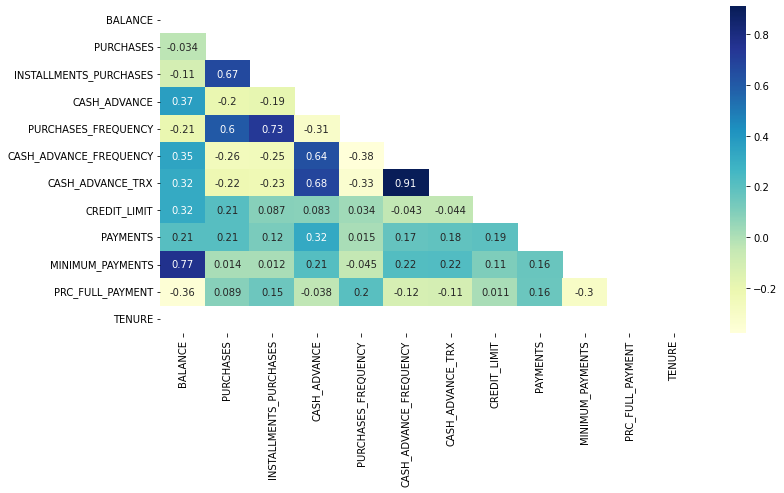

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,6))

#Set Up Mask To Hide Upper Triangle
mask = np.triu(np.ones_like(cor,dtype=bool))
triu_df = cor.mask(mask)

sns.heatmap(triu_df,annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
def remove_Highly_Correlated(df, bar=0.9):
  # Creates correlation matrix
  corr = df.corr()

  # Set Up Mask To Hide Upper Triangle
  mask = np.triu(np.ones_like(corr, dtype=bool))
  tri_df = corr.mask(mask)

  # Finding features with correlation value more than specified threshold value (bar=0.9)
  highly_cor_col = [col for col in tri_df.columns if any(tri_df[col] > bar )]
  print("Highly correlated columns: ",highly_cor_col)
  # Drop the highly correlated columns
  reduced_df = df.drop(highly_cor_col, axis = 1)
  print("Shape of total data",df.shape,"\nShape of reduced data",reduced_df.shape)
  return reduced_df

creditcard_df = remove_Highly_Correlated(creditcard_df,0.6)

Highly correlated columns:  ['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY']
Shape of total data (2994, 13) 
Shape of reduced data (2994, 8)


In [ ]:
creditcard_df.head(2)

,CUST_ID,PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,0.166667,0,1000.0,201.802084,139.509787,0.0,12
1,C10005,0.083333,0,1200.0,678.334763,244.791237,0.0,12


In [ ]:
# Let's drop Customer ID since it has no meaning here 
# Drop "TENURE" because the entire column contains only one value - doesn't add much information
# Drop "PRC_FULL_PAYMENT" because most of the values in the column contains only one value which is '0', which will not show any effect on the customer segmentation
creditcard_df.drop(columns=['PRC_FULL_PAYMENT', 'TENURE', 'CUST_ID'], inplace=True)
creditcard_df.head(2)

,PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,0.166667,0,1000.0,201.802084,139.509787
1,0.083333,0,1200.0,678.334763,244.791237


In [ ]:
creditcard_df.describe()

,PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
count,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000
mean,0.392006,1.777221,3192.027995,815.443883,469.319733
std,0.372497,2.423877,2423.088548,696.084869,349.738158
min,0.000000,0.000000,150.000000,0.000000,2.891346
25%,0.000000,0.000000,1500.000000,351.734224,200.538612
50%,0.333333,1.000000,2500.000000,601.995631,359.144947
75%,0.750000,3.000000,4000.000000,1040.778351,628.032529
max,1.000000,10.000000,13500.000000,4138.243604,1801.264841


In [ ]:
# Scaling the data
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)
creditcard_df_scaled = pd.DataFrame(creditcard_df_scaled, columns = creditcard_df.columns)
creditcard_df_scaled.head(2)

,PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,-0.605044,-0.733337,-0.904793,-0.881709,-0.943177
1,-0.828798,-0.733337,-0.822240,-0.197005,-0.642098


## **Stage 2:** K Means (5 Marks)

- Find the right number of clusters to be chosen using the elbow method
- Perform K-Means on the chosen optimal number of clusters

1 : 14970.0	2 : 11934.59	3 : 9960.38	4 : 8494.96	5 : 7261.46	6 : 6210.12	7 : 5730.68	8 : 5426.28	9 : 5133.81	

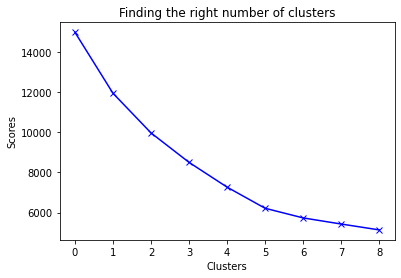

In [ ]:
# YOUR CODE HERE# Find the optimal number of clusters using the elbow method
scores_1 = []
range_values = range(1, 10)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  print(i,":", round(kmeans.inertia_, 2), end="\t")
  scores_1.append(kmeans.inertia_)

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

In [ ]:
# Apply k-means method
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

# Create a new column in the dataframe refering to the assigned clusters
creditcard_df_scaled['cluster'] = y_kmeans
creditcard_df_scaled.head()

,PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,cluster
0,-0.605044,-0.733337,-0.904793,-0.881709,-0.943177,0
1,-0.828798,-0.733337,-0.822240,-0.197005,-0.642098,0
2,1.632485,-0.733337,-0.368198,-0.195955,0.179348,1
3,-0.157540,-0.733337,1.571799,-0.182717,-0.450001,1
4,-1.052550,-0.320706,-0.079263,-0.014075,1.488914,2


## **Stage 3:** Apply **TSNE** with 2 components and visualize the clusters (5 Marks)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


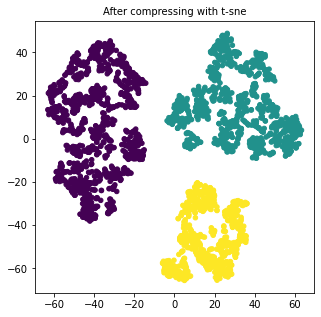

In [ ]:
X = TSNE(n_components=2).fit_transform(creditcard_df_scaled)

plt.figure(figsize=(5,5))
# Visualize the 2D plot after compressing the data using TSNE
plt.title('After compressing with t-sne', fontsize=10)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s= 20)
plt.show()

## **Stage 4:** Insights for each cluster

#### **Stage 4(a)** (3 Marks): 
- To understand the behavior of the customers from each cluster print the respective centroid point values
- Get the original representation of the scaled centroid points using [inverse_transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform) technique

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,-0.784547,0.264349,-0.407796,-0.329368,-0.240355
1,0.943309,-0.616156,0.072219,-0.238889,-0.461313
2,-0.043982,0.495883,0.651371,1.005396,1.196480


In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,0.099814,2.417863,2204.066986,586.214301,385.272371
1,0.743327,0.283985,3366.992551,649.184904,308.008011
2,0.375626,2.978979,4770.092820,1515.167663,887.704391


#### **Stage 4(b)** (3 Marks):
- Report your observations in the form of text, about the customers based on the centroid points

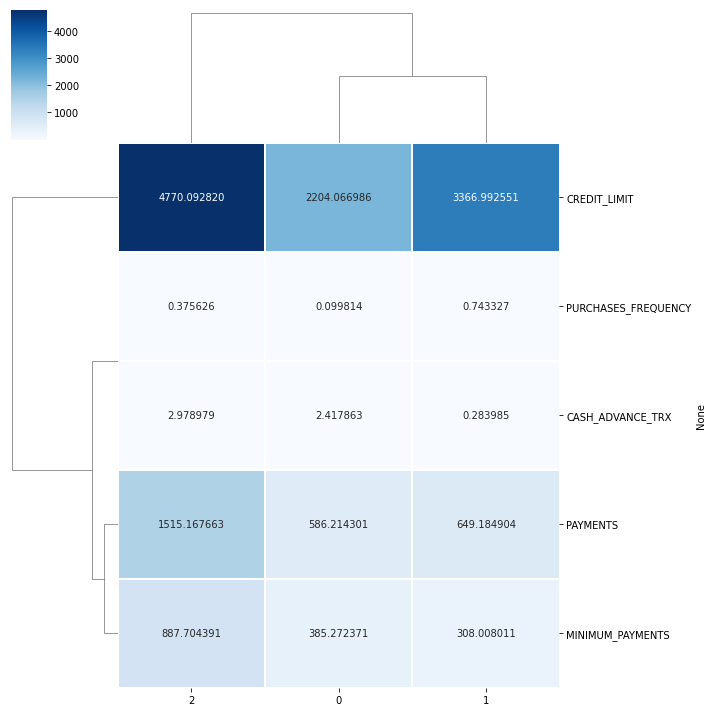

In [ ]:
import seaborn as sns
sns.clustermap(cluster_centers.T, cmap='Blues', linewidth=.5, annot=True, fmt='f');

In [ ]:
# YOUR ANALYSIS HERE

# Sample Analysis Below:

### First customer cluster: These are the customers with highest credit limit and highest payment amounts

### Second customers cluster: Highest purchase frequency with lowest cash advance transaction

### Third Customers cluster: Least purchase frequency with lower payment amounts